In [6]:
bigtraj = '/home/erik/Simulations/hinge_all/hinge1/aligned.dat'
top = '/home/erik/Simulations/hinge_all/hinge1/hinge_correct_seq.top'

In [7]:
import numpy as np
import os
import cProfile
import timeit
import matplotlib.pyplot as plt
from oxDNA_analysis_tools.UTILS.readers import ErikReader
from oxDNA_analysis_tools.UTILS.micha_reader import MichaReader
from collections import namedtuple
from functions import *

In [18]:
os.remove(bigtraj+'.pyidx')
t = timeit.timeit(stmt='MichaReader(top, bigtraj)', globals=globals(), number=10) / 10
print(t)
r = MichaReader(top, bigtraj)

0.07485626810012036


In [14]:
cProfile.run('r.read()')


         56127 function calls in 0.578 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.578    0.578 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 base_array.py:42(__init__)
        1    0.000    0.000    0.000    0.000 codecs.py:276(reset)
        1    0.000    0.000    0.056    0.056 codecs.py:319(decode)
        1    0.000    0.000    0.000    0.000 codecs.py:327(reset)
        1    0.000    0.000    0.000    0.000 codecs.py:331(getstate)
        1    0.206    0.206    0.474    0.474 micha_reader.py:127(_get_confs)
        1    0.000    0.000    0.000    0.000 micha_reader.py:133(<listcomp>)
        1    0.000    0.000    0.132    0.132 micha_reader.py:136(<listcomp>)
        1    0.001    0.001    0.088    0.088 micha_reader.py:139(_parse_conf)
        1    0.015    0.015    0.578    0.578 micha_reader.py:142(read)
        1    0.027    0.027    0.088    0.088 micha_r

In [15]:
timeit.timeit(stmt='r.read()', globals=globals(), number=10) / 10

0.09581582309983787

In [ ]:
cProfile.run('MichaReader(top, bigtraj)')

         54636 function calls in 11.711 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000   11.711   11.711 <string>:1(<module>)
     5574    0.010    0.000    0.019    0.000 <string>:1(__new__)
        1    0.000    0.000    0.000    0.000 __init__.py:145(_DType_reduce)
     2000    0.001    0.000    0.001    0.000 __init__.py:430(__getnewargs__)
        2    0.000    0.000    0.000    0.000 _bootlocale.py:33(getpreferredencoding)
        2    0.000    0.000    0.000    0.000 codecs.py:260(__init__)
        2    0.000    0.000    0.000    0.000 codecs.py:309(__init__)
        1    0.000    0.000    0.000    0.000 codecs.py:319(decode)
        1    0.000    0.000    0.000    0.000 codecs.py:331(getstate)
        1    0.000    0.000    0.000    0.000 copyreg.py:96(_slotnames)
        1    0.000    0.000    0.000    0.000 genericpath.py:16(exists)
     5575    0.053    0.000   11.020    0.002 micha_r

In [ ]:
Chunk = namedtuple('Chunk', ['block','offset', 'is_last','file_size'])
def blocks(file, fsize, size=1000000):
    current_chunk = 0  
    while True:
        b = file.read(size)
        if not b: break
        yield Chunk(b,current_chunk*size, current_chunk * size + size > fsize, fsize)
        current_chunk+=1

def binary_read(chunk_size):
    idx = []
    f = open(bigtraj, 'rb')
    while True:
        b = f.read(chunk_size)
        v = b.find(b't')
        idx.append(v)
        if not b: break
    
    return idx


In [ ]:
cProfile.run('binary_read(10000000)')

         1682 function calls in 0.844 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.002    0.002    0.844    0.844 <ipython-input-32-3d9e9b6a4f3f>:10(binary_read)
        1    0.000    0.000    0.844    0.844 <string>:1(<module>)
        1    0.000    0.000    0.844    0.844 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {built-in method io.open}
      559    0.000    0.000    0.000    0.000 {method 'append' of 'list' objects}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
      559    0.043    0.000    0.043    0.000 {method 'find' of 'bytes' objects}
      559    0.799    0.001    0.799    0.001 {method 'read' of '_io.BufferedReader' objects}




In [5]:
# This takes about 14 minutes to run
chunksize = [5000, 10000, 50000, 100000, 500000, 1000000, 5000000, 10000000, 50000000, 100000000, 500000000, 1000000000]
current = []
greedy = []
mm = []
for s in chunksize:
    current.append(timeit.timeit('index(bigtraj, s)', globals=globals(), number=10) / 10)
    greedy.append(timeit.timeit('index_greedy(bigtraj, s)', globals=globals(), number=10) / 10)
    mm.append(timeit.timeit('index_mmap(bigtraj, s)', globals=globals(), number=10) / 10)

KeyboardInterrupt: 

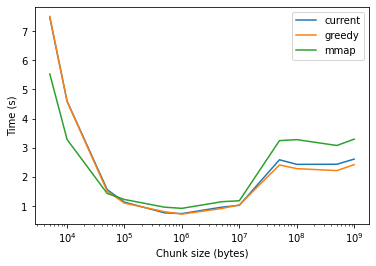

In [4]:
fig, ax = plt.subplots()
ax.plot(chunksize, current, label='current')
ax.plot(chunksize, greedy, label='greedy')
ax.plot(chunksize, mm, label='mmap')
ax.set_xscale('log')
ax.set_xlabel('Chunk size (bytes)')
ax.set_ylabel('Time (s)')
plt.legend()
plt.show()